Lab 12: SNA Continued 

Kobie Wiliams 

3/28/2022

The purpose of this is working with directed graphs that show which colleges and universities listed others as their peers. 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import networkx as nx
from IPython import display 
from operator import itemgetter 
from networkx.algorithms import community #This part of networkx, for community detection, needs to be imported separately 


In [2]:
df = pd.read_csv('https://drive.google.com/uc?export=download&id=1dL4umynK-O3q5lRkQNLdg8CTs0g6qz5s')

In [3]:
#List for institutions 
institutions = df['orgname']
#List for peers 
#peers = df['selected_peers_concat']


In [4]:
edges = [] 

for index, row in df.iterrows(): 
  curr_school = row['orgname'] 
  peers = row['selected_peers_concat'].split('|') 

  for peer in peers: 
    edges.append((curr_school, peer))


In [5]:
print(peers)

['Belmont Technical College', 'Central Ohio Technical College', 'Cincinnati State Technical and Community College', 'Clark State Community College', 'Columbus State Community College', 'Cuyahoga Community College District', 'Hocking College', 'Eastern Gateway Community College', 'Lakeland Community College', 'James A Rhodes State College', 'Lorain County Community College', 'Marion Technical College', 'North Central State College', 'Northwest State Community College', 'Owens Community College', 'Sinclair Community College', 'Stark State College of Technology', 'Southern State Community College', 'Terra State Community College', 'Washington State Community College']


In [6]:
#Creating a graph 
G = nx.DiGraph() 

#Adding the institutions as nodes 
G.add_nodes_from(institutions)

#Adding the peers as edges 
G.add_edges_from(edges) 


In [7]:
nx.info(G)

'DiGraph with 3320 nodes and 37850 edges'

In [8]:
density = nx.density(G) 
print('Network density:', density) 

Network density: 0.0034349510122442164


In [9]:
print('Manual calculation:', G.number_of_edges() / (G.number_of_nodes() * (G.number_of_nodes() - 1))) 

Manual calculation: 0.0034349510122442164


This is low density, because network density ranges from 0 to 1 so this is incredibly low. This does make sense because I wouldn't expect every school to be linked to each other. 

In [10]:
#Calculating in-degree 
in_degree_dict = dict(G.in_degree(G.nodes()))
nx.set_node_attributes(G, in_degree_dict, 'in_degree')

#Calculating out-degree 
out_degree_dict = dict(G.out_degree())
nx.set_node_attributes(G, out_degree_dict, 'out_degree')

#Calculating betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
nx.set_node_attributes(G, betweenness_dict, 'betweenness') 

#Calculating eigenvector centrality
eigenvector_dict = nx.eigenvector_centrality(G)
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector') 




In [11]:
#printing the values of Elon and two other schools 
print('For Elon University:') 
G.nodes['Elon University'] 



For Elon University:


{'betweenness': 0.0004957983905059715,
 'eigenvector': 0.0050464177231364675,
 'in_degree': 55,
 'out_degree': 11}

In [12]:
print('For York Technical College:') 
G.nodes['York Technical College'] 

For York Technical College:


{'betweenness': 0.0022045156652853426,
 'eigenvector': 2.1689292058260388e-07,
 'in_degree': 9,
 'out_degree': 19}

In [13]:
print('For Hocking College') 
G.nodes['Hocking College'] 

For Hocking College


{'betweenness': 0.0,
 'eigenvector': 3.097908153268815e-06,
 'in_degree': 13,
 'out_degree': 0}

We see with the three that they range in their betweenness centrality. York Technical College has the highest one which means more shortest paths go through this node than the other ones. Eigenvector centrality is highest for Hocking College because they are highly connected to other highly connected nodes. in-degree centrality is highest for elon beause they have alot of connections that point inward to them. York Technical college has the highest oud-degree centrality because they have the most outward nodes pointing to other vertices. 

In [14]:
from operator import itemgetter 

#sorting the in-degree centrality 
sorted_inDegree = sorted(in_degree_dict.items(), key=itemgetter(1), reverse=True)
print('Top 10 schools for in-degree centrality:') 
for x in sorted_inDegree[:10]: 
  print(x) 
print() 
#sorting the out-degree centrality 
sorted_outDegree = sorted(out_degree_dict.items(), key=itemgetter(1), reverse=True)
print('Top 10 schools for out-degree centrality:') 
for x in sorted_outDegree[:10]: 
  print(x) 
print() 
#sorting betweenness centrality 
sorted_between = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True) 
print('Top 10 schools for betweenness centrality:') 
for x in sorted_between[:10]: 
  print(x)
print() 
#sorting eigenvector centrality 
sorted_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)
print('Top 10 schools for eigenvector centrality:') 
for x in sorted_eigen[:10]: 
  print(x) 

Top 10 schools for in-degree centrality:
('Capella University', 77)
('Wheaton College', 72)
('Grand Canyon University', 68)
('Ashford University', 67)
('Daniel Webster College', 64)
('Strayer University-District of Columbia', 63)
('Carleton College', 62)
('DeVry University-Florida', 62)
('DeVry University-Illinois', 62)
('American InterContinental University-Online', 62)

Top 10 schools for out-degree centrality:
('Iowa State University', 100)
('Indiana Wesleyan University', 99)
('Lander University', 99)
('Rio Salado College', 99)
('The University of Tampa', 99)
('Bainbridge College', 98)
('Bowdoin College', 98)
('Central Wyoming College', 98)
('Guam Community College', 98)
('Trevecca Nazarene University', 98)

Top 10 schools for betweenness centrality:
('Southwestern College', 0.031709805987854056)
('Community College of Philadelphia', 0.02730428922721903)
('Fort Valley State University', 0.020882889965158608)
('Bethany College', 0.019285183175669456)
('Rutgers University-New Brunswic

Out-degree centrality is the most concentrated in terms of rating. There is only a 2 point difference between number 1 and 10 in out-degree centrality. Eigenvector centrality is also relatively close together. These 4 lists are different because of how the centralities are calculated. For detecting "school quality", I also have to know what constitutes quality. But if we are thinking about the common ideas for quality schools, it looks like eigenvector centrality helps you find that 

In [18]:
elon_neighbors = ['Elon University'] 

for e in G.edges: 
  if e[0] == 'Elon University':
    elon_neighbors.append(e[1]) 
  elif e[1] == 'Elon University': 
    elon_neighbors.append(e[0]) 
elon_neighbors
print(len(elon_neighbors))


67


In [19]:
#Subgraph 
H = G.subgraph(elon_neighbors) 

In [20]:
nx.info(H) #problem: I have 62 nodes and only 322 edges 

'DiGraph with 63 nodes and 388 edges'

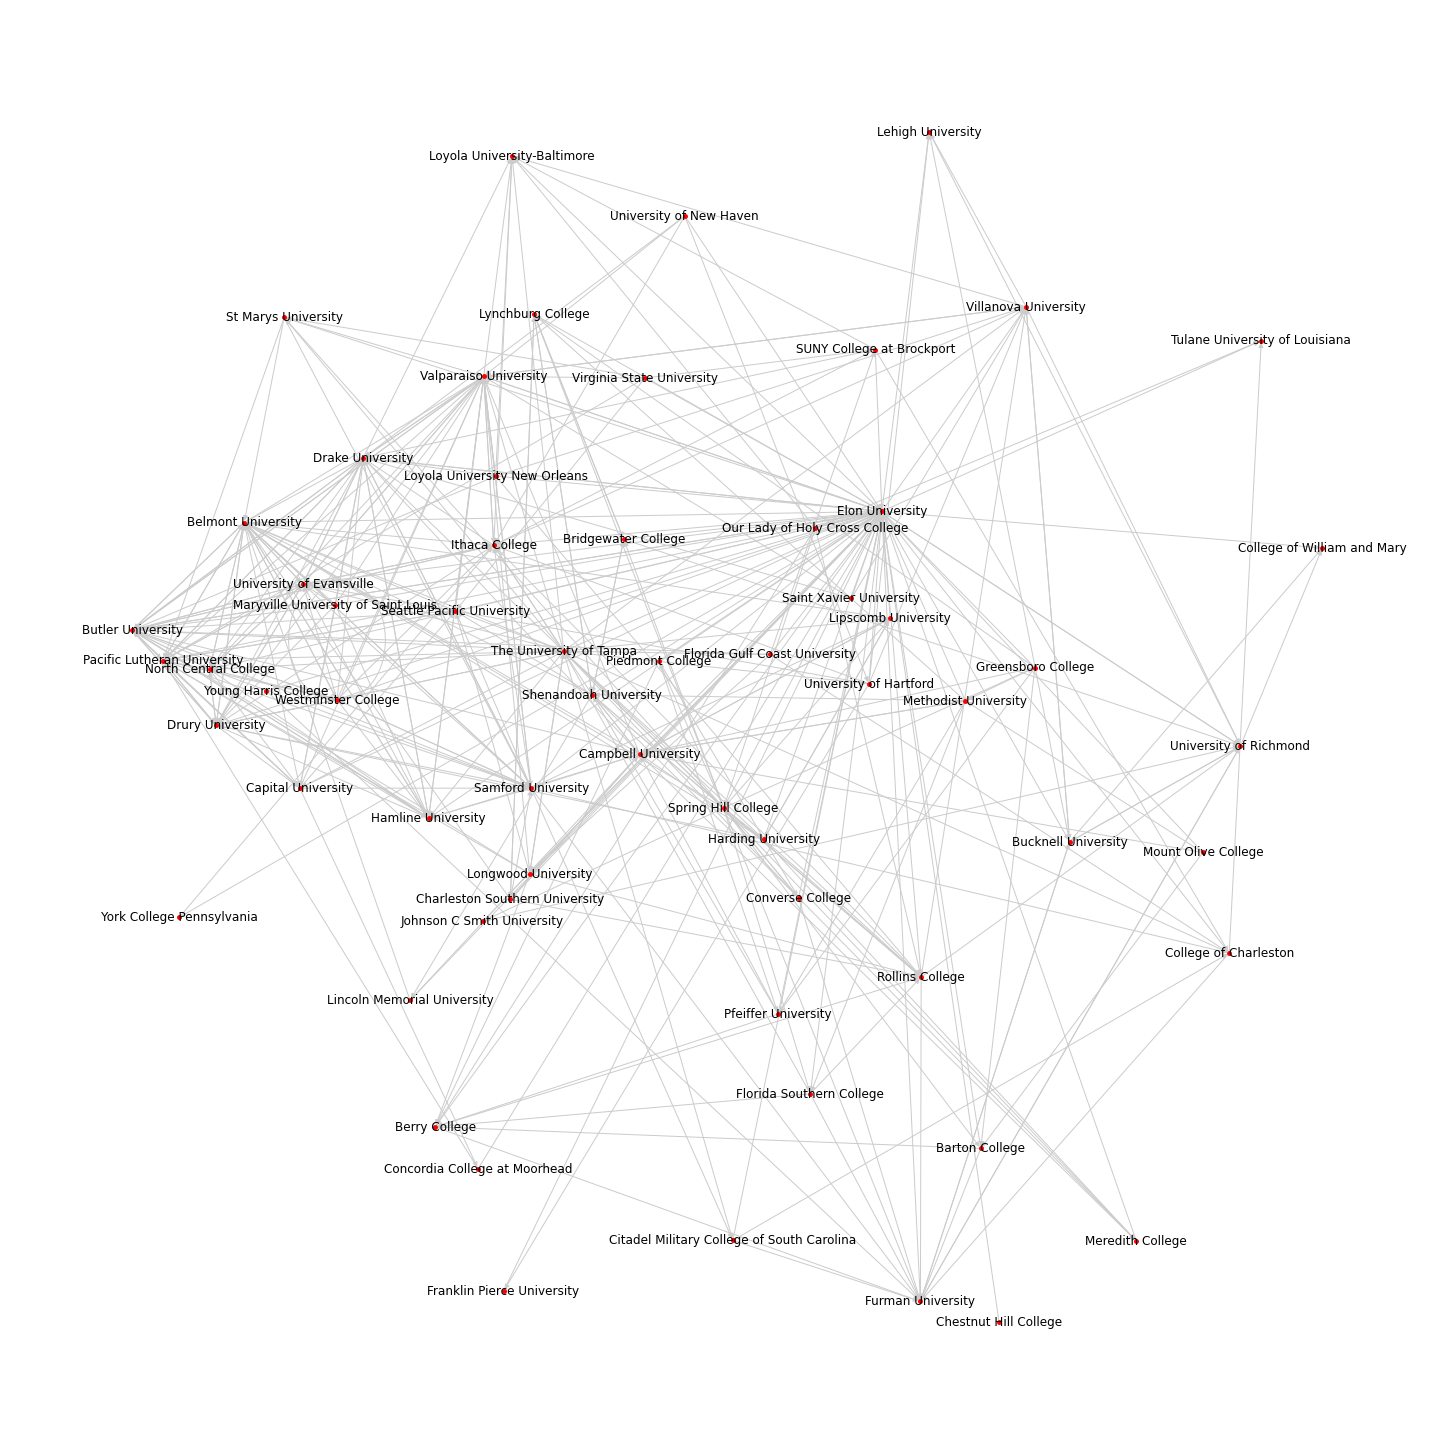

In [23]:
plt.figure(figsize=(20,20)) 
pos = nx.spring_layout(H, k=0.8) 
nx.draw(H, pos=pos, node_size=15, edge_color="#cccccc", with_labels=True, node_color='red')
plt.show() 